In [103]:
graphics_toolkit('qt')

In [104]:
addpath('../libs/');

# Principal Component Analysis

In [105]:
load('../../data/ex7data1.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name            Size                     Bytes  Class
  ====   ====            ====                     =====  ===== 
         K               1x1                          8  double
         S            1024x1024                    8192  double
         U            1024x1024                 8388608  double
         X              50x2                        800  double
         X_norm       5000x1024                40960000  double
         X_rec        5000x1024                40960000  double
         Z            5000x335                 13400000  double
         ans             1x1                          8  double
         i               1x1                          8  double
         loss            1x1                          8  double
         loss_quick      1x1                          8  double
         mu              1x1024                    8192  double
         sigma           1x1024

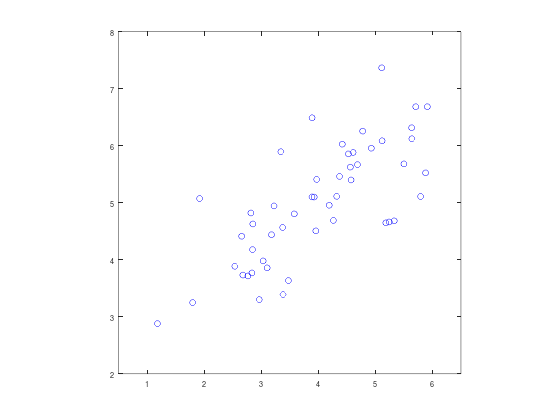

In [106]:
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]);
axis square;

## PCA

In [107]:
[X_norm, mu, sigma] = featureNormalize(X);

In [108]:
[U, S] = pca(X_norm);

Draw the eigenvectors centered at mean of data. These lines show the

directions of maximum variations in the dataset.

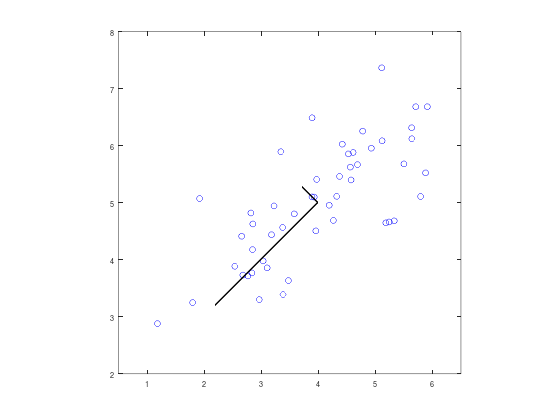

In [109]:
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]);
axis square;
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

In [110]:
fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


## Dimension reduction

In [111]:
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

Projection of the first example: 1.481274

(this value should be about 1.481274)



In [112]:
X_rec = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



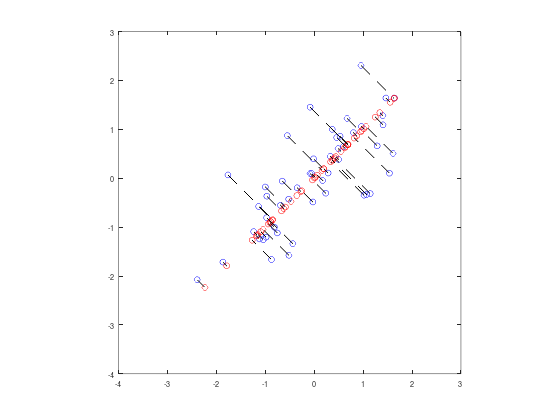

In [113]:
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i, :), X_rec(i, :), '--k', 'LineWidth', 1);
end
hold off;

In [117]:
loss = pcaLoss(X_norm, Z, U, K);
loss_quick = pcaLossQuick(S, K);
fprintf('for K = %d, %f %% of variance is retained, naive solution\n', K, ((1.0 - loss) * 100));
fprintf('for K = %d, %f %% of variance is retained, binary search solution\n', K, ((1.0 - loss_quick) * 100));

for K = 1, 86.776519 % of variance is retained, naive solution
for K = 1, 86.776519 % of variance is retained, binary search solution


In [118]:
fprintf('Minimum K=%d that satisfy, loss <= 0.01', pcaKinMaxLoss(S));

Minimum K=2 that satisfy, loss <= 0.01

## Loading and visualizing face data

In [194]:
load('../../data/ex7faces.mat');
whos;

Variables visible from the current scope:

variables in scope: top scope

  Attr   Name                   Size                     Bytes  Class
  ====   ====                   ====                     =====  ===== 
         A                    128x128x3                 393216  double
         K                      1x1                          8  double
         S                      3x3                         24  double
         U                      3x3                         72  double
         X                   5000x1024                40960000  double
         X_norm             16384x3                     393216  double
         X_rec               5000x1024                40960000  double
         Z                  16384x2                     262144  double
         ans                    1x2                         16  double
         centroids             16x3                        384  double
         colors              1000x3                      24000  double
    

ans = -55.077


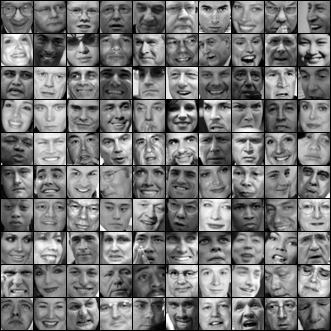

In [153]:
displayData(X(1:100, :))

# PCA on face data, eigenfaces

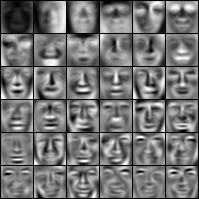

In [195]:
[X_norm, mu, sigma] = featureNormalize(X);
[U, S] = pca(X_norm);
displayData(U(:, 1:36)');

In [203]:
K = pcaKinMaxLoss(S, 0.01);
Z = projectData(X_norm, U, K);
fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));

The projected data Z has a size of: 5000 335 

In [204]:
X_rec = recoverData(Z, U, K);

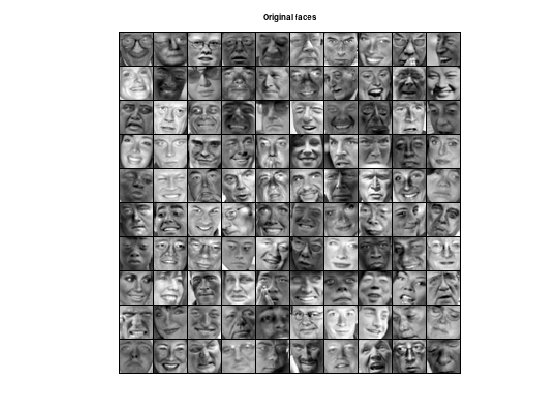

In [157]:
% Display normalized data
displayData(X_norm(1:100,:));
title('Original faces');
axis square;


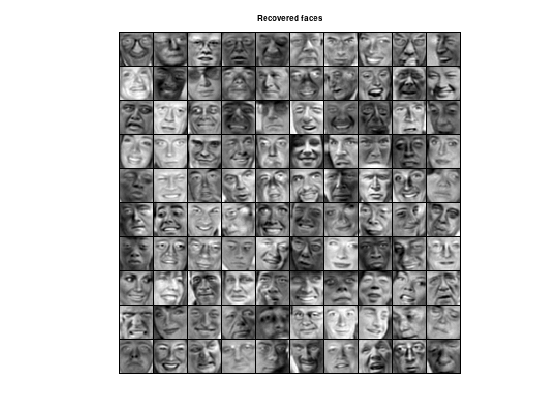

In [205]:
% Display reconstructed data from only k eigenfaces
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

In [206]:
loss = pcaLossQuick(S, K);
fprintf('for K=%d, %f %% of variance is retained\n', K, ((1.0 - loss) * 100));

for K=335, 99.004222 % loss of variance is retained


# Optional, PCA for visualization

In [161]:
A = double(imread('../../data/bird_small.png'));
A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);

In [162]:
K = 16;
max_iters = 10;

In [163]:
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


In [164]:
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

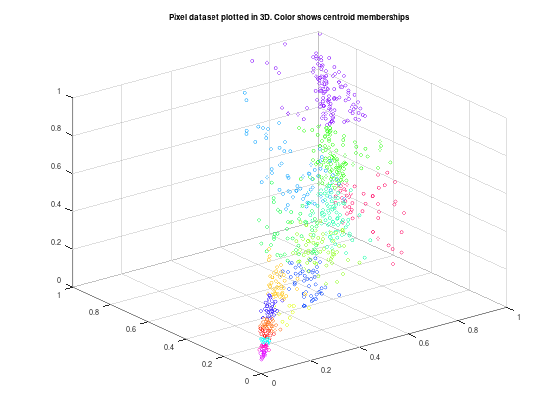

In [165]:
%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');

In [190]:
[X_norm, mu, sigma] = featureNormalize(X);
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

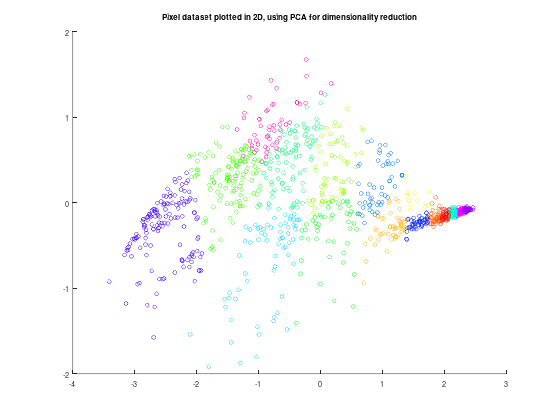

In [191]:
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');

In [192]:
loss = pcaLossQuick(S, 2);
fprintf('for K=%d, %f %% of variance is retained\n', 2, ((1.0 - loss) * 100));

for K=2, 99.341701 % loss of variance is retained
